In [2]:
import pandas as pd
import os

# Specify the file path (update the path as needed)
file_path = './data/AAPL_daily_5years.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Rename the "Unnamed: 0" column to "Date"
    df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

    # Convert the 'Date' column to datetime (make sure the format matches your data)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

    # Set the 'Date' column as the index of the DataFrame
    df.set_index('Date', inplace=True)

    # Check the data structure after modifications
    print(df.info())
    print(df.head())

else:
    print(f"File not found: {file_path}")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-08-30 to 2025-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB
None
               Open    High     Low   Close    Volume
Date                                                 
2024-08-30  230.190  230.40  227.48  229.00  52990770
2024-09-03  228.550  229.00  221.17  222.77  50190574
2024-09-04  221.660  221.78  217.48  220.85  43262758
2024-09-05  221.625  225.48  221.52  222.38  36615398
2024-09-06  223.950  225.24  219.77  220.82  48423011


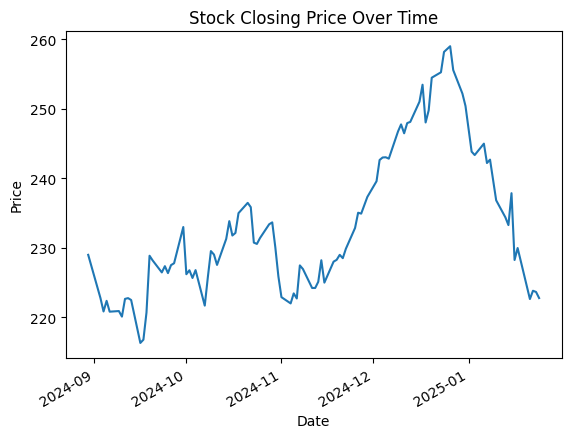

In [3]:
import matplotlib.pyplot as plt

df['Close'].plot(title='Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])


In [6]:
df['5_day_MA'] = df['Close'].rolling(window=5).mean()
df['20_day_MA'] = df['Close'].rolling(window=20).mean()


In [7]:
df['Price Change'] = df['Close'].pct_change()  # Daily percent change

In [8]:
df.index = df.index.tz_localize('UTC').tz_convert('America/New_York')  # Example

In [9]:
df.to_csv('processed_AAPL_data.csv')